In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(data=labels_val).to_csv('/workspace/jaeminjeon_950515/SNUH/school/bioinfo1/answer.csv')
pd.DataFrame(np.array(predictions_prob)[:,1]).to_csv('/workspace/jaeminjeon_950515/SNUH/school/bioinfo1/one_hot_prob.csv')

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline


fpr3, tpr3, thresholds = roc_curve(labels_val,np.array(a.iloc[:,0]))
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds = roc_curve(labels_val,np.array(predictions_prob)[:,1])
roc_auc3 = auc(fpr3, tpr3)
 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr2, tpr2, label='DNA BERT encoder (AUC = %0.2f)' % (roc_auc2))
plt.plot(fpr3, tpr3, label='One-hot encoder (AUC = %0.2f)' % (roc_auc3))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

# UMAP

In [1]:
import os
import torch
import torch.nn as nn
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#from keras.models import Sequential, Model
#from keras.layers import Dense, Input
import datatable as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import joblib
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import os
from keras.models import load_model
import joblib
from sklearn.neural_network import MLPClassifier
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
PATH='/home/jm/SNUH/methylation/v2/compare/'


os.environ["CUDA_VISIBLE_DEVICES"]="1" # 0, 1, 2, 3 중 하나
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4 # GPU 점유 비율
session = InteractiveSession(config=config)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

                        

2023-06-07 11:35:13.302532: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


cuda


2023-06-07 11:36:02.789572: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19470 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:41:00.0, compute capability: 8.6


In [3]:
data=pd.read_csv('/workspace/jaeminjeon_950515/SNUH/school/bioinfo1/35L33G.csv')
data['labels']='binding_Motif'
data1=pd.read_csv('/workspace/jaeminjeon_950515/SNUH/school/bioinfo1/control.csv')

data1.columns=['results','labels']
data1['labels']='control'
data=data.drop_duplicates('results')
data1=data1.drop_duplicates('results')

In [22]:
['binding_Motif']*20+['control']*20

['binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'binding_Motif',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control',
 'control']

In [7]:
list(data.iloc[:20,0])
list(data1.iloc[:20,0])

['TCTGGAGTGTCTGAAGAC',
 'CTTCTGGAGTGTCTGAAG',
 'ACCACATGGTGGCTCACA',
 'GATCTGACGCCCTCTTCT',
 'TTCCGAAGGTCCAGAGTT',
 'GGTCAGGAGTTCAAATCC',
 'CACATGGTGGCTCACAAC',
 'AACCACATGGTGGCTCAC',
 'GGTCCGGAGTTCAAATCC',
 'GAGCACCCGACTGCTCTT',
 'AAGATGAGGAGGACGTAA',
 'ATGAGGAGGACGTAAAAC',
 'GGCTTTGAGAGTCCTGAA',
 'CCTGACCAGCAGAGGCTG',
 'GACCAGCAGAGGCTGATC',
 'TTTGTGATGGGTGTGAAC',
 'CTTCCAAAGGTCCGGAGT',
 'CTTCCGAAGGTCAGGAGT',
 'TCTGACCTGTGCAGGCAC',
 'TATGAGGAGGTTGGTGTG']

In [9]:
bases=['A','C','G','T']
encoded_matrices = []
for seq in data.iloc[:20,0]:
    encoded_seq = []
    for base in seq:
        encoded_base = [int(base == b) for b in bases]
        encoded_seq.append(encoded_base)
    encoded_matrices.append(encoded_seq)

# Convert the list of matrices to a numpy array
encoded_matrices = np.array(encoded_matrices)
bases=['A','C','G','T']
encoded_matrices1 = []
for seq in data1.iloc[:20,0]:
    encoded_seq = []
    for base in seq:
        encoded_base = [int(base == b) for b in bases]
        encoded_seq.append(encoded_base)
    encoded_matrices1.append(encoded_seq)

# Convert the list of matrices to a numpy array
encoded_matrices1 = np.array(encoded_matrices)

In [19]:
encoded_matrices=encoded_matrices.reshape(20,72)
encoded_matrices1=encoded_matrices1.reshape(20,72)

In [25]:
a=pd.DataFrame(encoded_matrices)
b=pd.DataFrame(encoded_matrices1)

In [27]:
c=pd.concat([a,b])
c=c.reset_index(drop=True)

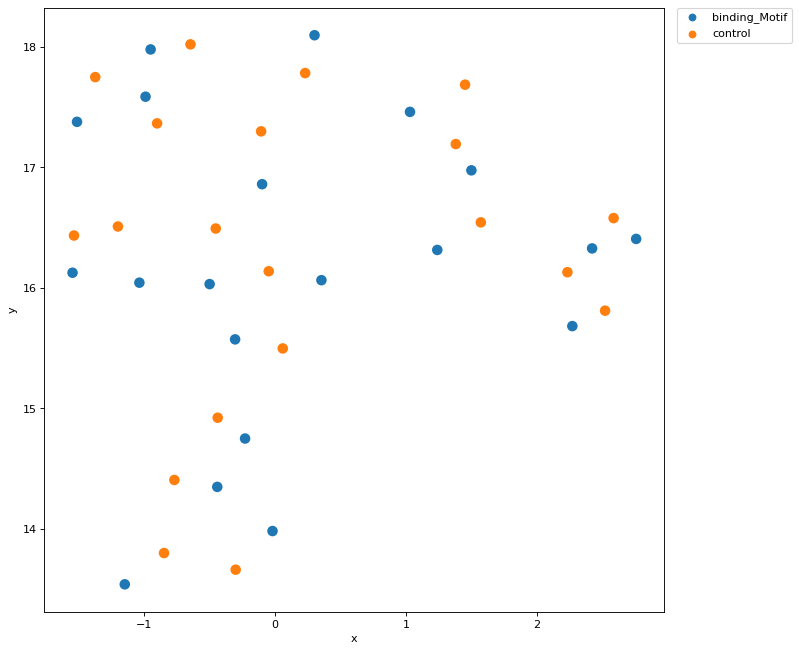

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import umap

embedding_gene_corr_full = umap.UMAP().fit_transform(c)

figure(figsize=(10, 10), dpi=80)
plot=pd.DataFrame(index=range(len(embedding_gene_corr_full)),columns =['x','y','type'])
plot['x']=embedding_gene_corr_full[:,0]
plot['y']=embedding_gene_corr_full[:,1]
plot['type']=['binding_Motif']*20+['control']*20
umall=sns.scatterplot(x='x',y='y',hue='type',data=plot,s=90,linewidth=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
umall = umall.get_figure()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from transformers import AutoTokenizer, AutoModel
model_name = "InstaDeepAI/nucleotide-transformer-500m-human-ref"
#model_name = "BMILab/TCR-BERT-MLM"
tokenizer = AutoTokenizer.from_pretrained(model_name)
encoded_matrices = tokenizer(train_sequences, truncation=True, padding=True, return_tensors='pt')
input_ids = encoded_matrices['input_ids'].to(device)
attention_mask = encoded_matrices['attention_mask'].to(device)
#label_batch1 = torch.tensor(train_labels).to(device)
bert_model = AutoModel.from_pretrained(model_name).to(device)
a=list()
for i in range(0,input_ids.shape[0]):
    
    outputs = bert_model(input_ids[i:i+1],attention_mask[i:i+1])
    a.append(outputs.last_hidden_state[:, 0, :].cpu().detach().numpy())

In [ ]:
data=pd.read_csv('/workspace/jaeminjeon_950515/SNUH/school/bioinfo1/35L33G.csv')
data['labels']='binding_Motif'
data1=pd.read_csv('/workspace/jaeminjeon_950515/SNUH/school/bioinfo1/control.csv')

data1.columns=['results','labels']
data1['labels']='control'
data=pd.concat([data,data1])

In [23]:
data

,results,labels
0,GTGGGTAAGAGCACCCGA,binding_Motif
18,CTTCTGGAGTGTCTGAAG,binding_Motif
32,CATAATTTGTGGTAGTGG,binding_Motif
43,CTCTTCTGGAGTGTCTGA,binding_Motif
48,CTTCTGGTGTGTCTGAAG,binding_Motif
...,...,...
23252,AGTAATTTGTGCGGGTTT,binding_Motif
23253,GGTCAAGAGAGTATGAAC,binding_Motif
23254,ACAGAGCAGTGGTTCTGC,binding_Motif
23255,CTTAGAACGTGGATGCCA,binding_Motif


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import umap

embedding_gene_corr_full = umap.UMAP().fit_transform(full_data)

figure(figsize=(10, 10), dpi=80)
plot=pd.DataFrame(index=range(len(embedding_gene_corr_full)),columns =['x','y','type'])
plot['x']=embedding_gene_corr_full[:,0]
plot['y']=embedding_gene_corr_full[:,1]
plot['type']=sample_label.iloc[:,1].to_list()
umall=sns.scatterplot(x='x',y='y',hue='type',data=plot,s=90,linewidth=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
umall = umall.get_figure()